<a href="https://colab.research.google.com/github/cpython-projects/da_1709/blob/main/lesson_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔷 ABC-аналіз

## Навіщо робити ABC-аналіз?

ABC-аналіз — це **простий і потужний спосіб розставити пріоритети**. Він допомагає відповісти на питання:

> Які товари приносять найбільшу частку виручки і де варто зосередити зусилля?

Ми майже завжди стикаємося з тим, що:

* **20% товарів** приносять **80% виручки** (принцип Парето),
* А більшість товарів створюють **мізерну частку доходу**, але потребують ресурсів (зберігання, логістика, маркетинг).

---

## Застосування

* управління запасами (логістика),
* оптимізація асортименту (retail),
* аналіз виручки (фінанси),
* управління SKU (Stock Keeping Unit/товарна позиція) (продуктова аналітика).

---

## Основна ідея

Поділити товари за **внеском у сукупну виручку**:

| Клас | Виручка | Орієнтовний % товарів | Ціль управління           |
| ---- | ------- | --------------------- | ------------------------- |
| A    | 70–80%  | 10–20%                | Максимальний контроль     |
| B    | 15–25%  | \~30%                 | Пошук покращень           |
| C    | ≤ 5%    | 50–60%                | Автоматизація, скорочення |

---

## Етапи ABC-аналізу

1. **Підготовка даних**: виручка по кожному товару (або SKU).
2. **Агрегація** (якщо потрібно): групування за ID, сума виручки.
3. **Сортування** за спаданням виручки.
4. **Накопичення** частки від загального обсягу.
5. **Класифікація** за порогами: A / B / C.
6. **Інтерпретація та дії**.


## Приклад

In [1]:
import pandas as pd

data = {
    'item_id': ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A7'],
    'total_sales_value': [1000, 800, 500, 200, 150, 100, 50, 2000]
}

df = pd.DataFrame(data)
df

,item_id,total_sales_value
0,A1,1000
1,A2,800
2,A3,500
3,A4,200
4,A5,150
5,A6,100
6,A7,50
7,A7,2000


In [2]:
# Крок 1. Групування за товарами (якщо дублюються)
df_grouped = df.groupby('item_id').agg({
    'total_sales_value': 'sum'
}).reset_index()
df_grouped

,item_id,total_sales_value
0,A1,1000
1,A2,800
2,A3,500
3,A4,200
4,A5,150
5,A6,100
6,A7,2050


In [3]:
# Крок 2. Сортування за спаданням
df_sorted = df_grouped.sort_values('total_sales_value', ascending=False).reset_index()
df_sorted

,index,item_id,total_sales_value
0,6,A7,2050
1,0,A1,1000
2,1,A2,800
3,2,A3,500
4,3,A4,200
5,4,A5,150
6,5,A6,100


In [4]:
df_sorted['total_sales_value'].cumsum()

,total_sales_value
0,2050
1,3050
2,3850
3,4350
4,4550
5,4700
6,4800


In [5]:
# Крок 3. Накопичення та відсоток

df_sorted['cum_total'] = df_sorted['total_sales_value'].cumsum()
df_sorted

,index,item_id,total_sales_value,cum_total
0,6,A7,2050,2050
1,0,A1,1000,3050
2,1,A2,800,3850
3,2,A3,500,4350
4,3,A4,200,4550
5,4,A5,150,4700
6,5,A6,100,4800


In [6]:
df_sorted['total_sales_value'].cumsum()

,total_sales_value
0,2050
1,3050
2,3850
3,4350
4,4550
5,4700
6,4800


In [9]:
total = df_sorted.total_sales_value.sum()
df_sorted['cum_total_percents'] = df_sorted.cum_total / total
df_sorted

,index,item_id,total_sales_value,cum_total,cum_total_percents
0,6,A7,2050,2050,0.427083
1,0,A1,1000,3050,0.635417
2,1,A2,800,3850,0.802083
3,2,A3,500,4350,0.906250
4,3,A4,200,4550,0.947917
5,4,A5,150,4700,0.979167
6,5,A6,100,4800,1.000000


In [10]:
# Крок 4. Присвоєння класу
def abc_classify(item):
  if item <= 0.8:
    return 'A'
  if item <= 0.95:
    return 'B'
  return 'C'

df_sorted['ABC'] = df_sorted.cum_total_percents.apply(abc_classify)
df_sorted

,index,item_id,total_sales_value,cum_total,cum_total_percents,ABC
0,6,A7,2050,2050,0.427083,A
1,0,A1,1000,3050,0.635417,A
2,1,A2,800,3850,0.802083,B
3,2,A3,500,4350,0.906250,B
4,3,A4,200,4550,0.947917,B
5,4,A5,150,4700,0.979167,C
6,5,A6,100,4800,1.000000,C


## Що робити після ABC-класифікації?

### Клас A (ключові)

* Максимум уваги: постачання, склад, просування.
* Стежити за залишками, рекламою, знижками.
* Часто аналізувати динаміку.

### Клас B (середня значущість)

* Оптимізувати: умови закупівлі, постачальників.
* Є потенціал зростання — варто подумати про маркетинг.

### Клас C (низькопріоритетні)

* Мінімізувати запаси.
* Об’єднувати SKU, видаляти неефективні.
* Можливо — перевести на автоматичний контроль.


# 🔷 XYZ-аналіз

## Навіщо робити XYZ-аналіз?

Якщо ABC-аналіз показує, **що важливо за виручкою**, то XYZ-аналіз показує:

> Наскільки **стабільний попит** на товар?

Ви можете мати товар із високою виручкою, але якщо він продається стрибкоподібно і нестабільно — з ним треба поводитися обережно (ризик залишків, дефіциту, списань).

---

## Основна ідея

Оцінити **прогнозованість попиту** за коефіцієнтом варіації.
*Коефіцієнт варіації* — це відносна міра розкиду даних, яка показує, наскільки сильно варіюються значення відносно їхнього середнього.

| Клас | Стабільність попиту     | Інтерпретація                      |
| ---- | ----------------------- | ---------------------------------- |
| X    | Висока стабільність     | Попит майже не змінюється          |
| Y    | Середня прогнозованість | Є коливання, але в межах норми     |
| Z    | Низька стабільність     | Хаотичний, сезонний або випадковий |

---

## Як вимірюється?

Через **коефіцієнт варіації (CV)**:

$$
\text{CV} = \frac{\text{Стандартне відхилення}}{\text{Середнє значення}}
$$

---

## Етапи XYZ-аналізу

1. Підготовка даних: продажі за періодами (наприклад, за місяцями).
2. Розрахунок середнього та стандартного відхилення по кожному товару.
3. Розрахунок коефіцієнта варіації (CV).
4. Класифікація на X/Y/Z.
5. Інтерпретація та дії.


## Приклад

In [11]:
data = {
    'item_id': ['A1', 'A2', 'A3', 'A4', 'A5'],
    'jan': [100, 120, 90, 200, 10],
    'feb': [100, 80, 100, 250, 30],
    'mar': [100, 110, 105, 50, 90],
    'apr': [100, 95, 95, 300, 70]
}

df = pd.DataFrame(data)
df

,item_id,jan,feb,mar,apr
0,A1,100,100,100,100
1,A2,120,80,110,95
2,A3,90,100,105,95
3,A4,200,250,50,300
4,A5,10,30,90,70


In [12]:
# Крок 1. Розрахунок середнього та стандартного відхилення
df['mean_sales'] = df[['jan', 'feb', 'mar', 'apr']].mean(axis=1)
df['std_sales'] = df[['jan', 'feb', 'mar', 'apr']].std(axis=1)

# Розраховуємо середнє та стандартне відхилення за місяцями


df

,item_id,jan,feb,mar,apr,mean_sales,std_sales
0,A1,100,100,100,100,100.00,0.000000
1,A2,120,80,110,95,101.25,17.500000
2,A3,90,100,105,95,97.50,6.454972
3,A4,200,250,50,300,200.00,108.012345
4,A5,10,30,90,70,50.00,36.514837


In [14]:
# Крок 2. Коефіцієнт варіації
df['cv'] = (df.std_sales / df.mean_sales)
df

,item_id,jan,feb,mar,apr,mean_sales,std_sales,cv
0,A1,100,100,100,100,100.00,0.000000,0.000000
1,A2,120,80,110,95,101.25,17.500000,0.172840
2,A3,90,100,105,95,97.50,6.454972,0.066205
3,A4,200,250,50,300,200.00,108.012345,0.540062
4,A5,10,30,90,70,50.00,36.514837,0.730297


In [15]:
# Крок 3. Класифікація за порогами
def xyz_classify(item):
  if item <= 0.25:
    return 'X'
  if item <= 0.50:
    return 'Y'
  return 'Z'


df['xyz'] = df.cv.apply(xyz_classify)
df

,item_id,jan,feb,mar,apr,mean_sales,std_sales,cv,xyz
0,A1,100,100,100,100,100.00,0.000000,0.000000,X
1,A2,120,80,110,95,101.25,17.500000,0.172840,X
2,A3,90,100,105,95,97.50,6.454972,0.066205,X
3,A4,200,250,50,300,200.00,108.012345,0.540062,Z
4,A5,10,30,90,70,50.00,36.514837,0.730297,Z


## Як інтерпретувати?

| Клас | Що це означає                              | Що робити?                                          |
| ---- | ------------------------------------------ | --------------------------------------------------- |
| X    | Попит стабільний, легко прогнозувати       | Планувати точно, тримати у постійній наявності      |
| Y    | Середня прогнозованість, помірні коливання | Підлаштовуватися під тренди, враховувати сезонність |
| Z    | Нестабільний, хаотичний попит              | Мінімальні запаси, уникати автоматичного поповнення |


# 🔷 ABC+XYZ матриця

## Комбінація ABC і XYZ: матриця 3×3

Об’єднуючи обидва аналізи, отримуємо **матрицю з 9 категорій товарів**:

|       | **X (стабільний)** | **Y (помірний)** | **Z (хаотичний)** |
| ----- | ------------------ | ---------------- | ----------------- |
| **A** | AX                 | AY               | AZ                |
| **B** | BX                 | BY               | BZ                |
| **C** | CX                 | CY               | CZ                |

---

## Інтерпретація комірок ABC+XYZ

### 1. **AX — стратегічні товари**

* Висока цінність і стабільний попит.
* Постійна наявність на складі.
* Пріоритетне управління.

---

### 2. **AY — важливі, але з коливаннями**

* Дає великий оборот, але попит нестабільний.
* Потрібен регулярний аналіз попиту та гнучкі закупівлі.

---

### 3. **AZ — важливі, але непередбачувані**

* Високий дохід, але попит хаотичний.
* Ризики переваги/дефіциту.
* Краще закуповувати по факту, за замовленнями.

---

### 4. **BX — середня цінність, стабільний попит**

* Добре прогнозуються.
* Можна закуповувати за планом.
* Рівень контролю трохи нижчий, ніж у AX.

---

### 5. **BY — помірні за значущістю і стабільністю**

* Стандартна стратегія управління запасами.
* Моніторинг, але не пріоритет.

---

### 6. **BZ — середня важливість, хаотичний попит**

* Бажано скоротити склад або перейти на замовлення під клієнта.

---

### 7. **CX — дешеві, але стабільні**

* Можна закуповувати великими партіями.
* Підходять для автоматичного поповнення.

---

### 8. **CY — дешеві, помірно нестабільні**

* Можливо мати запас, але обережно.
* Баланс між витратами та ризиками.

---

### 9. **CZ — дешеві і хаотичні**

* Кандидати на виведення з асортименту.
* Закупівля по факту або виключення.

---

## Як використовувати на практиці?

* **AX, BX** — автоматизація закупівель, регулярний перегляд.
* **AZ, BZ, CZ** — зменшення складських залишків, закупівля по замовленню.
* **CY, CZ** — кандидати на видалення/заміну.
* **ABC** — формує пріоритет за важливістю.
* **XYZ** — формує пріоритет за прогнозованістю.


# 🔷 Приклад

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/cpython-projects/da_2603/refs/heads/main/abc_xyz_dataset.csv')
df.head()

,Item_ID,Item_Name,Category,Jan_Demand,Feb_Demand,Mar_Demand,Apr_Demand,May_Demand,Jun_Demand,Jul_Demand,Aug_Demand,Sep_Demand,Oct_Demand,Nov_Demand,Dec_Demand,Total_Annual_Units,Price_Per_Unit,Total_Sales_Value
0,ITM_001,Surface Near,Grocery,4516,4069,4664,4653,4508,4125,4669,4210,4824,4497,4259,4782,53776,10,537760
1,ITM_002,Central Him,Grocery,4792,4964,4628,4660,4897,5015,4805,4686,4896,4536,4520,5054,57453,100,5745300
2,ITM_003,Win Everyone,Apparel,61,175,38,43,15,161,224,41,387,340,70,21,1576,2,3152
3,ITM_004,Task Save,Apparel,1145,1113,717,832,783,954,1047,894,994,978,1136,712,11305,2,22610
4,ITM_005,Hotel Teacher,Grocery,1494,2051,1400,1918,1669,1733,1695,1560,1679,1381,1591,1662,19833,10,198330


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Item_ID             1000 non-null   object
 1   Item_Name           1000 non-null   object
 2   Category            1000 non-null   object
 3   Jan_Demand          1000 non-null   int64 
 4   Feb_Demand          1000 non-null   int64 
 5   Mar_Demand          1000 non-null   int64 
 6   Apr_Demand          1000 non-null   int64 
 7   May_Demand          1000 non-null   int64 
 8   Jun_Demand          1000 non-null   int64 
 9   Jul_Demand          1000 non-null   int64 
 10  Aug_Demand          1000 non-null   int64 
 11  Sep_Demand          1000 non-null   int64 
 12  Oct_Demand          1000 non-null   int64 
 13  Nov_Demand          1000 non-null   int64 
 14  Dec_Demand          1000 non-null   int64 
 15  Total_Annual_Units  1000 non-null   int64 
 16  Price_Per_Unit      1000 

<Axes: >

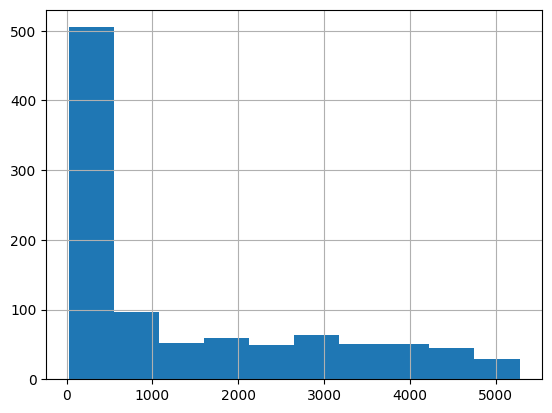

In [17]:
df.Jan_Demand.hist()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Item_ID             1000 non-null   object
 1   Item_Name           1000 non-null   object
 2   Category            1000 non-null   object
 3   Jan_Demand          1000 non-null   int64 
 4   Feb_Demand          1000 non-null   int64 
 5   Mar_Demand          1000 non-null   int64 
 6   Apr_Demand          1000 non-null   int64 
 7   May_Demand          1000 non-null   int64 
 8   Jun_Demand          1000 non-null   int64 
 9   Jul_Demand          1000 non-null   int64 
 10  Aug_Demand          1000 non-null   int64 
 11  Sep_Demand          1000 non-null   int64 
 12  Oct_Demand          1000 non-null   int64 
 13  Nov_Demand          1000 non-null   int64 
 14  Dec_Demand          1000 non-null   int64 
 15  Total_Annual_Units  1000 non-null   int64 
 16  Price_Per_Unit      1000 

In [21]:
# Сортування за спаданням виручки
df = df.sort_values(by='Total_Sales_Value', ascending=False).reset_index()
# Частка від загальної виручки
df['cum_total'] = df.Total_Sales_Value.cumsum()
total = df.Total_Sales_Value.sum()
df['cum_total_percents'] = df.cum_total / total


In [22]:
df

,level_0,index,Item_ID,Item_Name,Category,Jan_Demand,Feb_Demand,Mar_Demand,Apr_Demand,May_Demand,...,Aug_Demand,Sep_Demand,Oct_Demand,Nov_Demand,Dec_Demand,Total_Annual_Units,Price_Per_Unit,Total_Sales_Value,cum_total,cum_total_percents
0,0,924,ITM_925,Ten And,Grocery,4991,4663,5068,4885,5127,...,5129,5127,4840,4774,5023,59462,1000,59462000,59462000,0.055453
1,1,511,ITM_512,Radio Race,Grocery,4185,4087,3660,3774,4391,...,4155,3936,3646,3959,4208,47606,1000,47606000,107068000,0.099850
2,2,521,ITM_522,Pattern Book,Grocery,3079,3185,3081,2794,3313,...,3241,3309,2997,2781,2859,37136,1000,37136000,144204000,0.134483
3,3,394,ITM_395,Animal Key,Grocery,5180,4626,5010,4802,4856,...,4910,4631,4959,4867,4903,59609,500,29804500,174008500,0.162278
4,4,168,ITM_169,Material Vote,Grocery,4871,4994,4740,4958,4428,...,4672,4477,4544,4553,4982,56862,500,28431000,202439500,0.188792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,177,ITM_178,Investment Agreement,Electronics,63,63,59,72,55,...,59,59,61,75,65,756,2,1512,1072282530,0.999995
996,996,482,ITM_483,Along Have,Home & Kitchen,45,53,76,60,51,...,57,60,76,56,65,728,2,1456,1072283986,0.999996
997,997,408,ITM_409,Indicate Organization,Home & Kitchen,53,53,70,62,55,...,69,62,48,54,60,698,2,1396,1072285382,0.999998
998,998,568,ITM_569,Worry Because,Toys,50,65,61,60,51,...,51,54,55,50,45,645,2,1290,1072286672,0.999999


In [23]:
# Класифікація
# Крок 4. Присвоєння класу
def abc_classify(item):
  if item <= 0.8:
    return 'A'
  if item <= 0.95:
    return 'B'
  return 'C'

df['ABC'] = df.cum_total_percents.apply(abc_classify)
df



,level_0,index,Item_ID,Item_Name,Category,Jan_Demand,Feb_Demand,Mar_Demand,Apr_Demand,May_Demand,...,Sep_Demand,Oct_Demand,Nov_Demand,Dec_Demand,Total_Annual_Units,Price_Per_Unit,Total_Sales_Value,cum_total,cum_total_percents,ABC
0,0,924,ITM_925,Ten And,Grocery,4991,4663,5068,4885,5127,...,5127,4840,4774,5023,59462,1000,59462000,59462000,0.055453,A
1,1,511,ITM_512,Radio Race,Grocery,4185,4087,3660,3774,4391,...,3936,3646,3959,4208,47606,1000,47606000,107068000,0.099850,A
2,2,521,ITM_522,Pattern Book,Grocery,3079,3185,3081,2794,3313,...,3309,2997,2781,2859,37136,1000,37136000,144204000,0.134483,A
3,3,394,ITM_395,Animal Key,Grocery,5180,4626,5010,4802,4856,...,4631,4959,4867,4903,59609,500,29804500,174008500,0.162278,A
4,4,168,ITM_169,Material Vote,Grocery,4871,4994,4740,4958,4428,...,4477,4544,4553,4982,56862,500,28431000,202439500,0.188792,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,177,ITM_178,Investment Agreement,Electronics,63,63,59,72,55,...,59,61,75,65,756,2,1512,1072282530,0.999995,C
996,996,482,ITM_483,Along Have,Home & Kitchen,45,53,76,60,51,...,60,76,56,65,728,2,1456,1072283986,0.999996,C
997,997,408,ITM_409,Indicate Organization,Home & Kitchen,53,53,70,62,55,...,62,48,54,60,698,2,1396,1072285382,0.999998,C
998,998,568,ITM_569,Worry Because,Toys,50,65,61,60,51,...,54,55,50,45,645,2,1290,1072286672,0.999999,C


In [24]:
df.ABC.value_counts()

,count
ABC,
C,743
B,170
A,87


In [26]:
monthly_columns = [col for col in df.columns if '_Demand' in col and len(col) == 10]
monthly_columns

['Jan_Demand',
 'Feb_Demand',
 'Mar_Demand',
 'Apr_Demand',
 'May_Demand',
 'Jun_Demand',
 'Jul_Demand',
 'Aug_Demand',
 'Sep_Demand',
 'Oct_Demand',
 'Nov_Demand',
 'Dec_Demand']

In [30]:
# Розрахунок CV по рядках
df['mean_sales'] = df[monthly_columns].mean(axis=1)
df['std_sales'] = df[monthly_columns].std(axis=1)
df['cv'] = (df.std_sales / df.mean_sales)

df
# Класифікація за XYZ



,level_0,index,Item_ID,Item_Name,Category,Jan_Demand,Feb_Demand,Mar_Demand,Apr_Demand,May_Demand,...,Total_Annual_Units,Price_Per_Unit,Total_Sales_Value,cum_total,cum_total_percents,ABC,mean_sales,std_sales,cv,XYZ
0,0,924,ITM_925,Ten And,Grocery,4991,4663,5068,4885,5127,...,59462,1000,59462000,59462000,0.055453,A,4955.166667,175.138300,0.035345,Z
1,1,511,ITM_512,Radio Race,Grocery,4185,4087,3660,3774,4391,...,47606,1000,47606000,107068000,0.099850,A,3967.166667,242.380930,0.061097,Z
2,2,521,ITM_522,Pattern Book,Grocery,3079,3185,3081,2794,3313,...,37136,1000,37136000,144204000,0.134483,A,3094.666667,199.492234,0.064463,Z
3,3,394,ITM_395,Animal Key,Grocery,5180,4626,5010,4802,4856,...,59609,500,29804500,174008500,0.162278,A,4967.416667,265.766972,0.053502,Z
4,4,168,ITM_169,Material Vote,Grocery,4871,4994,4740,4958,4428,...,56862,500,28431000,202439500,0.188792,A,4738.500000,203.303848,0.042905,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,177,ITM_178,Investment Agreement,Electronics,63,63,59,72,55,...,756,2,1512,1072282530,0.999995,C,63.000000,5.704862,0.090553,Z
996,996,482,ITM_483,Along Have,Home & Kitchen,45,53,76,60,51,...,728,2,1456,1072283986,0.999996,C,60.666667,9.499601,0.156587,Z
997,997,408,ITM_409,Indicate Organization,Home & Kitchen,53,53,70,62,55,...,698,2,1396,1072285382,0.999998,C,58.166667,6.685579,0.114938,Z
998,998,568,ITM_569,Worry Because,Toys,50,65,61,60,51,...,645,2,1290,1072286672,0.999999,C,53.750000,5.832900,0.108519,Z


In [31]:
df['XYZ'] = df.cv.apply(xyz_classify)
df

,level_0,index,Item_ID,Item_Name,Category,Jan_Demand,Feb_Demand,Mar_Demand,Apr_Demand,May_Demand,...,Total_Annual_Units,Price_Per_Unit,Total_Sales_Value,cum_total,cum_total_percents,ABC,mean_sales,std_sales,cv,XYZ
0,0,924,ITM_925,Ten And,Grocery,4991,4663,5068,4885,5127,...,59462,1000,59462000,59462000,0.055453,A,4955.166667,175.138300,0.035345,X
1,1,511,ITM_512,Radio Race,Grocery,4185,4087,3660,3774,4391,...,47606,1000,47606000,107068000,0.099850,A,3967.166667,242.380930,0.061097,X
2,2,521,ITM_522,Pattern Book,Grocery,3079,3185,3081,2794,3313,...,37136,1000,37136000,144204000,0.134483,A,3094.666667,199.492234,0.064463,X
3,3,394,ITM_395,Animal Key,Grocery,5180,4626,5010,4802,4856,...,59609,500,29804500,174008500,0.162278,A,4967.416667,265.766972,0.053502,X
4,4,168,ITM_169,Material Vote,Grocery,4871,4994,4740,4958,4428,...,56862,500,28431000,202439500,0.188792,A,4738.500000,203.303848,0.042905,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,177,ITM_178,Investment Agreement,Electronics,63,63,59,72,55,...,756,2,1512,1072282530,0.999995,C,63.000000,5.704862,0.090553,X
996,996,482,ITM_483,Along Have,Home & Kitchen,45,53,76,60,51,...,728,2,1456,1072283986,0.999996,C,60.666667,9.499601,0.156587,X
997,997,408,ITM_409,Indicate Organization,Home & Kitchen,53,53,70,62,55,...,698,2,1396,1072285382,0.999998,C,58.166667,6.685579,0.114938,X
998,998,568,ITM_569,Worry Because,Toys,50,65,61,60,51,...,645,2,1290,1072286672,0.999999,C,53.750000,5.832900,0.108519,X


In [32]:
df.XYZ.value_counts()

,count
XYZ,
X,853
Y,86
Z,61


In [33]:
# Об'єднання
df['ABC_XYZ'] = df.ABC + df.XYZ
df


,level_0,index,Item_ID,Item_Name,Category,Jan_Demand,Feb_Demand,Mar_Demand,Apr_Demand,May_Demand,...,Price_Per_Unit,Total_Sales_Value,cum_total,cum_total_percents,ABC,mean_sales,std_sales,cv,XYZ,ABC_XYZ
0,0,924,ITM_925,Ten And,Grocery,4991,4663,5068,4885,5127,...,1000,59462000,59462000,0.055453,A,4955.166667,175.138300,0.035345,X,AX
1,1,511,ITM_512,Radio Race,Grocery,4185,4087,3660,3774,4391,...,1000,47606000,107068000,0.099850,A,3967.166667,242.380930,0.061097,X,AX
2,2,521,ITM_522,Pattern Book,Grocery,3079,3185,3081,2794,3313,...,1000,37136000,144204000,0.134483,A,3094.666667,199.492234,0.064463,X,AX
3,3,394,ITM_395,Animal Key,Grocery,5180,4626,5010,4802,4856,...,500,29804500,174008500,0.162278,A,4967.416667,265.766972,0.053502,X,AX
4,4,168,ITM_169,Material Vote,Grocery,4871,4994,4740,4958,4428,...,500,28431000,202439500,0.188792,A,4738.500000,203.303848,0.042905,X,AX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,177,ITM_178,Investment Agreement,Electronics,63,63,59,72,55,...,2,1512,1072282530,0.999995,C,63.000000,5.704862,0.090553,X,CX
996,996,482,ITM_483,Along Have,Home & Kitchen,45,53,76,60,51,...,2,1456,1072283986,0.999996,C,60.666667,9.499601,0.156587,X,CX
997,997,408,ITM_409,Indicate Organization,Home & Kitchen,53,53,70,62,55,...,2,1396,1072285382,0.999998,C,58.166667,6.685579,0.114938,X,CX
998,998,568,ITM_569,Worry Because,Toys,50,65,61,60,51,...,2,1290,1072286672,0.999999,C,53.750000,5.832900,0.108519,X,CX


In [34]:
df.ABC_XYZ.value_counts()

,count
ABC_XYZ,
CX,615
BX,154
AX,84
CY,72
CZ,56
BY,11
BZ,5
AY,3


In [ ]:
# A/X — найважливіші та стабільні

# пріоритет для автоматизації закупівель

# стабільна логістика, максимум уваги



In [ ]:
# Зведена таблиця: кількість товарів у кожній групі ABC/XYZ

pivot = df.pivot_table(index='ABC', columns='XYZ', values='Item_ID', aggfunc='count', fill_value=0)
pivot

XYZ,X,Y,Z
ABC,,,
A,84,3,0
B,154,11,5
C,615,72,56


### ✅ A/X (84 SKU) — **Золотий фонд**

* Високий внесок у виручку
* Стабільний попит
* **Що робити:**

  * Тримати максимальний пріоритет
  * Гарантувати постійну доступність
  * Ретельно відстежувати продажі
  * Не допускати out-of-stock за жодних умов
  * Застосовувати автоматичне поповнення

---

### ✅ A/Y (28 SKU) — **Важливі, але коливаються**

* Висока цінність
* Середня стабільність
* **Що робити:**

  * Відстежувати тренди та сезонність
  * Використовувати просунутий прогноз попиту (наприклад, ковзні середні)
  * Тримати середній рівень запасів
  * Планувати промо, якщо спадання повторюється по часу

---

### ✅ A/Z (17 SKU) — **Ризикові, але дорогі**

* Дуже важливі
* Дуже нестабільні
* **Що робити:**

  * Перевірити причини нестабільності: акції, збої постачання, сезонність
  * Застосувати підхід JIT (just in time)
  * Уникати переваги запасів
  * Узгодити зі стратегічним відділом: «тримати під замовлення» або «пульсова закупівля»

---

### 🟨 B/X (111 SKU) — **Надійні робочі конячки**

* Середня цінність
* Надійний попит
* **Що робити:**

  * Підтримувати запаси стабільно
  * Можна автоматизувати закупівлі
  * Контролювати залишки, але без надмірностей

---

### 🟨 B/Y (30 SKU) — **Менш стабільні, середня цінність**

* Складніше прогнозувати
* **Що робити:**

  * Використовувати помірне буферне зберігання
  * Відстежувати сплески
  * Застосовувати ручний контроль або ML-модель на основі коливань

---

### 🟨 B/Z (29 SKU) — **Нестабільні та середньоцінні**

* Погано прогнозуються
* **Що робити:**

  * Мінімізувати запаси
  * Під замовлення, по заявці
  * Не тримати на складі «про запас»

---

### 🟥 C/X (484 SKU) — **Багато, стабільно, але дешево**

* Мало приносять, але добре прогнозуються
* **Що робити:**

  * Використовувати автоматичне поповнення за залишковим принципом
  * Продавати через long-tail канали (маркетплейси, акції, розпродажі)
  * Можна формувати промо-набори

---

### 🟥 C/Y (158 SKU) — **Багато, середньо передбачувано**

* Неефективні та нестабільні
* **Що робити:**

  * Провести аналіз — навіщо вони потрібні?
  * Скоротити номенклатуру
  * Передати на знижену ціну або розпродаж

---

### 🟥 C/Z (101 SKU) — **Нижній баласт**

* Мінімальний внесок + хаотичний попит
* **Що робити:**

  * Оптимізувати: прибрати з зберігання
  * Списати, ліквідувати
  * Перевести на дозаказ за запитом клієнта
  * Не тримати на складі


In [ ]:
# Групування: виручка за ABC/XYZ
revenue_df = df.groupby('ABC_XYZ')['Total_Sales_Value'].sum().reset_index()
revenue_df


,ABC_XYZ,Total_Sales_Value
0,AX,843443700
1,AY,12644500
2,BX,152426390
3,BY,5748200
4,BZ,4204600
5,CX,46731410
6,CY,3856592
7,CZ,3232508


In [ ]:
# Сортування за виручкою
revenue_df = revenue_df.sort_values(by='Total_Sales_Value', ascending=False)
revenue_df


,ABC_XYZ,Total_Sales_Value
0,AX,843443700
2,BX,152426390
5,CX,46731410
1,AY,12644500
3,BY,5748200
4,BZ,4204600
6,CY,3856592
7,CZ,3232508


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

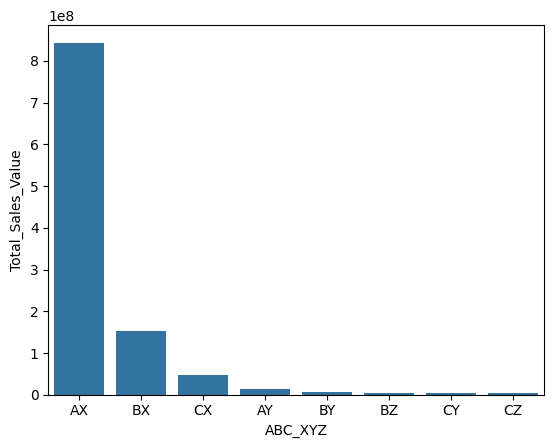

In [ ]:
sns.barplot(data=revenue_df, x='ABC_XYZ', y='Total_Sales_Value')
plt.show()